In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as mpp
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("archive/Salary_Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
x = df['YearsExperience']
y = df['Salary']

print(x)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64


In [5]:
x = x[:,np.newaxis]

In [6]:
model = SVR(C=1000, gamma=0.5, kernel='rbf')
model.fit(x,y)

SVR(C=1000, gamma=0.5)

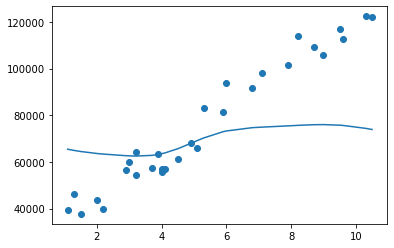

In [7]:
mpp.scatter(x,y)
mpp.plot(x,model.predict(x))

## grid search

In [8]:
parameters = {
    'kernel':['rbf'],
    'C':[1000,10000,100000],
    'gamma':[0.5,0.05,0.005]
}
gs = GridSearchCV(model,parameters)
gs.fit(x,y)
print(gs.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [9]:
newModel = SVR(C=100000, gamma=0.005, kernel='rbf')

In [10]:
newModel.fit(x,y)
newModel.predict(x)

array([ 38602.30604463,  39971.45253269,  41388.83016542,  45134.67200409,
        46710.20960376,  52542.65182444,  53413.34071594,  55180.51411553,
        55180.51411553,  59737.37278346,  61610.28757787,  62556.43189749,
        62556.43189749,  63508.66957751,  67372.96677451,  71312.09372756,
        73303.8737919 ,  75307.28655126,  81363.09721551,  82375.83893851,
        90457.93620386,  93459.46749134, 101301.90451968, 104159.83980921,
       108792.79601248, 111482.8165275 , 115795.05827219, 116629.73115409,
       122187.0162143 , 123677.14319161])

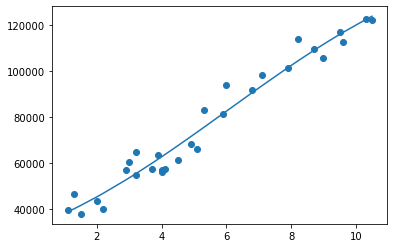

In [11]:
mpp.scatter(x,y)
mpp.plot(x,newModel.predict(x))
mpp.show()